In [ ]:
!pip install scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Target PDF's SHORT_ABSTRACT:
M12552/0 : Baldivis sand exploration : ( Non-Statutory Report ) ( 1/2/2005- ? ) Baldivis Sand project , M70/1046 located south Perth Fremantle 1:100,000 Pinjarra 1:250,000 map sheet . Aircore drilling October 2005 carried determine types sand could expected present across site w ...

Top 3 similar documents to a071228_051017_baldivis_minexpreport_10321296.pdf are:

PDF Name: a073768_annual  report  47_1314_11490840.pdf
SHORT_ABSTRACT: M13088/0 : Mulga Downs iron ore exploration : ( Annual Report ) ( 1/7/2005-1/7/2006 ) Carboy Well project , E47/1314 , part Mulga Downs project 40 km northwest town Wittenoom Mount Bruce Pyramid 1:250 000 map sheets . tenement area lies within Chichester Ranges comprise terrain low hills separated narrow valleys gently dip ...

PDF Name: a072502_kus_c87_2004_text2005a_12897294.pdf
SHORT_ABSTRACT: M1

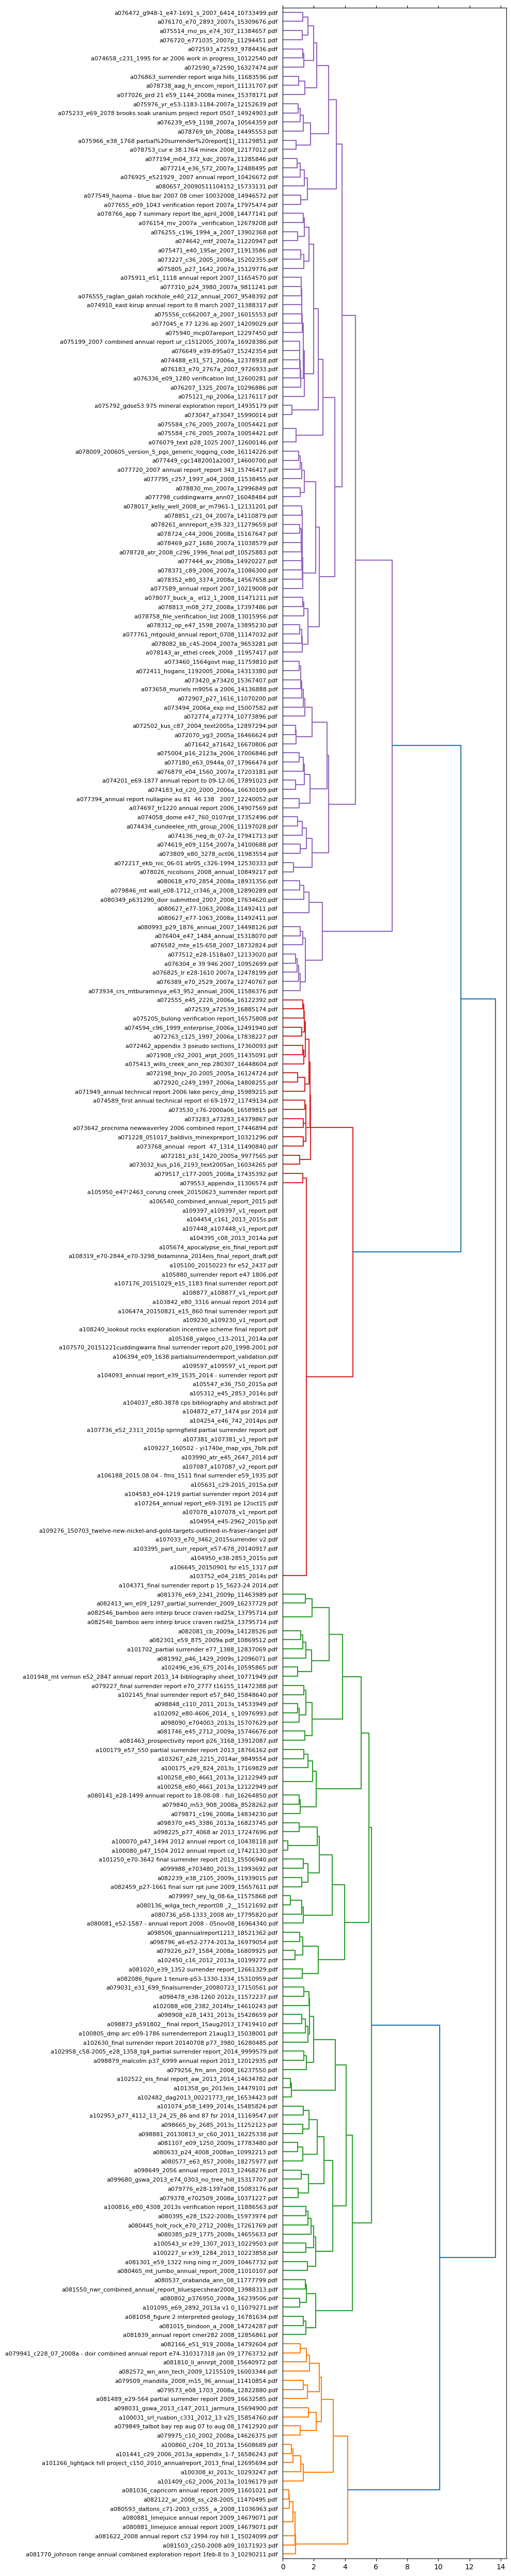

In [4]:
from google.colab import drive
drive.mount('/content/drive')

from scipy.cluster.hierarchy import ward, dendrogram, fcluster, single, complete
import matplotlib.pyplot as plt

# Variables to be input by users
folder_path = "/content/drive/MyDrive/CITS5553_Group 5/wamex_metadata/subset_3"
target_pdf = 'a071228_051017_baldivis_minexpreport_10321296.pdf'
n = 3

def analyze_documents(folder_path,target_pdf,n):
    import os
    import json
    import numpy as np
    import nltk
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords as sw
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.metrics.pairwise import cosine_similarity

    # Downloading required NLTK packages
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)

    ### Nested functions:

    # Processing the text data
    def process_text(text):
        tokens = word_tokenize(text)
        stopwords = set(sw.words('english'))
        tokens = [token for token in tokens if token.lower() not in stopwords]
        return ' '.join(tokens)

    # Function to get the top n similar documents
    def get_top_n_similar_documents(index, similarity_matrix, n=5):
        # Getting similarity values for the given document with all other documents
        similarity_values = similarity_matrix[index]

        # Sorting the indices based on similarity values in descending order
        sorted_indices = np.argsort(similarity_values)[::-1]

        # Excluding the first index because it will be the given document itself (similarity with itself is 1)
        return sorted_indices[1:n+1]

    def find_similar_docs():
        file_list = os.listdir(folder_path)
        # Creating list to hold documents' contents
        documents = []

        # Creating list to hold corresponding PDF filenames
        pdf_file_list = []

        # Loading the JSON files and extracting content
        for file_name in file_list:
            if file_name.endswith('.json'):                      # Checking if the file is a JSON file
                with open(os.path.join(folder_path, file_name), 'r') as file:
                    data = json.load(file)
                    abstract = data.get("SHORT_ABSTRACT", "")    # Using the information in the short abstract & title sections to represent the content of the documents
                    documents.append(process_text(abstract))
                    pdf_filename = data.get("pdf_files", [None])[0]   # Getting the corresponding PDF filename
                    if pdf_filename:                             # Appendding the PDF filename to pdf_file_list
                        pdf_file_list.append(pdf_filename)

        vectorizer = TfidfVectorizer()                           # Using TF-IDF to vectorize the processed content
        tfidf_matrix = vectorizer.fit_transform(documents)

        # similarity_matrix[i][j] gives the cosine similarity between the i-th and j-th document
        similarity_matrix = cosine_similarity(tfidf_matrix)

        #HIERARCHICAL CLUSTERING
        #SOURCE - https://www.kaggle.com/code/tchainzzz/agglomerative-document-clustering-on-cord-19
        dist = 1 - similarity_matrix
        dist = dist - dist.min()
        linkage_matrix = ward(dist)

        fig, ax = plt.subplots(figsize=(20,30))
        ax = dendrogram(linkage_matrix, orientation="right", leaf_font_size=8, labels=pdf_file_list)
        plt.tick_params(axis='x', bottom='off', top='off', labelbottom='off')
        plt.tight_layout() #show plot with tight layout
        plt.savefig(os.path.join(folder_path,'ward_clusters_2.png'), dpi=300)

        try:
            # Choosing a document index for the target PDF
            document_index = pdf_file_list.index(target_pdf)

            # Getting the top n similar document indices
            top_n_indices = get_top_n_similar_documents(document_index, similarity_matrix, n)

            print("\nTarget PDF's SHORT_ABSTRACT:")
            print(documents[pdf_file_list.index(target_pdf)])
            # Printing the top n similar documents
            print(f"\nTop {n} similar documents to {target_pdf} are:")
            for i in top_n_indices:
                print("\nPDF Name:", pdf_file_list[i])
                print("SHORT_ABSTRACT:", documents[i])

        except ValueError:
            print(f"'{target_pdf}' not found in pdf_file_list.")

    # Executing the find_similar_docs function
    find_similar_docs()

# Example usage:
analyze_documents("/content/drive/MyDrive/CITS5553_Group 5/wamex_metadata/subset_1",'a071228_051017_baldivis_minexpreport_10321296.pdf',3)



NameError: ignored

In [ ]:
dist = 1 - similarity_matrix
dist = dist - dist.min()
linkage_matrix = ward(dist)

NameError: ignored

In [ ]:
 try:
            # Choosing a document index for the target PDF
            document_index = pdf_file_list.index(target_pdf)

            # Getting the top n similar document indices
            top_n_indices = get_top_n_similar_documents(document_index, similarity_matrix, n)

            print("\nTarget PDF's SHORT_ABSTRACT:")
            print(documents[pdf_file_list.index(target_pdf)])
            # Printing the top n similar documents
            print(f"\nTop {n} similar documents to {target_pdf} are:")
            for i in top_n_indices:
                print("\nPDF Name:", pdf_file_list[i])
                print("SHORT_ABSTRACT:", documents[i])

        except ValueError:
            print(f"'{target_pdf}' not found in pdf_file_list.")

    # Executing the find_similar_docs function
    find_similar_docs()

# Example usage:
analyze_documents("/content/drive/MyDrive/CITS5553_Group 5/wamex_metadata/subset_1",'a071228_051017_baldivis_minexpreport_10321296.pdf',3)

